This notebook contains the experimental results presented in Section 4 of the paper "An evaluation framework for personalization strategy experiment design", to appear in AdKDD 2020 workshop (in conjunction with SIGKDD'20, San Diego, CA, held virtually due to the COVID-19 pandemic).


In [2]:
from matplotlib import pyplot as plt
import numpy as np
from pedeval.util import find_all_bootstrap_mean_evaluations

# Actual Effect evaluations

In [3]:
# Setting

# design_actual_effect_evaluations = (
#     find_all_bootstrap_mean_evaluations(in_dir='./output', 
#                                         expt_design_name='normal_intersectiononly', 
#                                         quantity_name='AE')
# )

design_actual_effect_evaluations = (
    find_all_bootstrap_mean_evaluations(in_dir='./output', 
                                        expt_design_name='normal_allsample', 
                                        quantity_name='AE')
)

# design_actual_effect_evaluations = (
#     find_all_bootstrap_mean_evaluations(in_dir='./output', 
#                                         expt_design_name='normal_qualifiedonly', 
#                                         quantity_name='AE')
# )

# design_actual_effect_evaluations = (
#     find_all_bootstrap_mean_evaluations(in_dir='./output', 
#                                         expt_design_name='normal_dualcontrol', 
#                                         quantity_name='AE')
# )

In [4]:
# Print how many evals have theoretical quantity within 1-alpha bootstrap CI

n_in_bootstrap_CI = np.array([e.theoretical_value_within_centred_CI(0.05) 
                              for e in design_actual_effect_evaluations]).sum()
n_eval = len(design_actual_effect_evaluations)

print(f"Number of eval with theoretical quantity in (1-alpha) BRCI: {n_in_bootstrap_CI}/{n_eval}.")

Number of eval with theoretical quantity in (1-alpha) BRCI: 853/999.


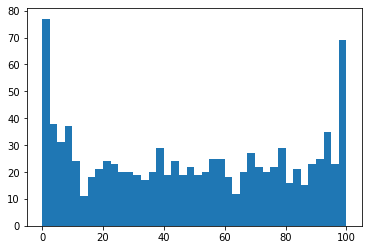

In [5]:
# Histogram of percentiles of theoretical values in relation to the bootstrap samples
# if the theoretical quantity is right the histrogram should display a uniform distribution

plt.hist([e.percentile_of_theoretical_value()
          for e in design_actual_effect_evaluations], bins=np.arange(0, 102.5, 2.5))

plt.show()

Number of samples - n_0: 15105, n_1: 4984, n_2: 119, n_3: 883
Theoretical MDE Size: 0.09183805006777744


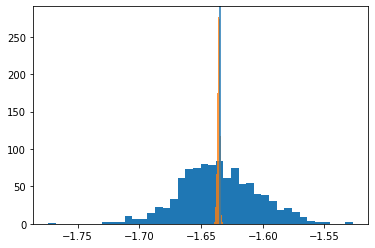

In [6]:
# Individual experiment diagnostic plot
eval_number = 2

e = design_actual_effect_evaluations[eval_number]
ee = e.experiment_design
print(f"Number of samples - n_0: {ee.n_0}, n_1: {ee.n_1}, n_2: {ee.n_2}, n_3: {ee.n_3}")
print(f"Theoretical MDE Size: {ee.theoretical_mde_size()}")
# print(e.initial_samples)
plt.hist(e.initial_samples, bins=40)
plt.hist(e.bootstrap_mean_samples, bins=10, alpha=0.8)
plt.axvline(e.get_theoretical_value())
plt.show()

# MDES evaluations

In [7]:
# Setting

# design_mde_size_evaluations = (
#     find_all_bootstrap_mean_evaluations(in_dir='./output', 
#                                         expt_design_name='normal_intersectiononly', 
#                                         quantity_name='MDES')
# )

design_mde_size_evaluations = (
    find_all_bootstrap_mean_evaluations(in_dir='./output', 
                                        expt_design_name='normal_allsample', 
                                        quantity_name='MDES')
)

# design_mde_size_evaluations = (
#     find_all_bootstrap_mean_evaluations(in_dir='./output', 
#                                         expt_design_name='normal_qualifiedonly', 
#                                         quantity_name='MDES')
# )

# design_mde_size_evaluations = (
#     find_all_bootstrap_mean_evaluations(in_dir='./output', 
#                                         expt_design_name='normal_dualcontrol', 
#                                         quantity_name='MDES')
# )


In [8]:
# Print how many evals have theoretical quantity within 1-alpha bootstrap CI

n_in_bootstrap_CI = np.array([e.theoretical_value_within_centred_CI(0.05) 
                              for e in design_mde_size_evaluations]).sum()
n_eval = len(design_mde_size_evaluations)

print(f"Number of eval with theoretical quantity in (1-alpha) BRCI: {n_in_bootstrap_CI}/{n_eval}.")

Number of eval with theoretical quantity in (1-alpha) BRCI: 87/106.


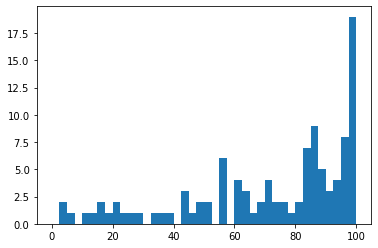

In [9]:
# Histogram of percentiles of theoretical values in relation to the bootstrap samples
# if the theoretical quantity is right the histrogram should display a normal distribution

plt.hist([e.percentile_of_theoretical_value()
          for e in design_mde_size_evaluations], bins=np.arange(0, 102.5, 2.5))

plt.show()

Number of samples - n_0: 433, n_1: 1414, n_2: 108, n_3: 14623
Theoretical MDE Size: 0.08274573122662768
Indicated % overestimate: -0.07654361471960348


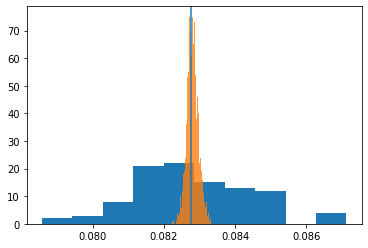

In [10]:
# Individual evaluation diagnostic plot
eval_number = 0

e = design_mde_size_evaluations[eval_number]
ee = e.experiment_design
print(f"Number of samples - n_0: {ee.n_0}, n_1: {ee.n_1}, n_2: {ee.n_2}, n_3: {ee.n_3}")
print(f"Theoretical MDE Size: {ee.theoretical_mde_size()}")

indicated_pct_overestimate = \
    (ee.theoretical_mde_size() - np.mean(e.bootstrap_mean_samples)) / np.mean(e.bootstrap_mean_samples) * 100
print(f"Indicated % overestimate: {indicated_pct_overestimate}")
# print(e.initial_samples)
plt.hist(e.initial_samples)
plt.hist(e.bootstrap_mean_samples, bins=40, alpha=0.8)
plt.axvline(e.get_theoretical_value())
plt.show()

(array([ 4.,  4.,  7., 14., 18., 23., 11., 14.,  5.,  6.]),
 array([-0.41310286, -0.30007422, -0.18704557, -0.07401693,  0.03901171,
         0.15204035,  0.26506899,  0.37809763,  0.49112628,  0.60415492,
         0.71718356]),
 <a list of 10 Patch objects>)

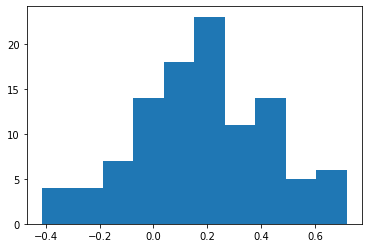

In [11]:
# Histogram of over/underestimates across all evaluations of the same quantity

percent_overestimate = [
    (e.experiment_design.theoretical_mde_size() - np.mean(e.bootstrap_mean_samples)) / 
    np.mean(e.bootstrap_mean_samples) * 100
    for e in design_mde_size_evaluations
]

plt.hist(percent_overestimate)